# _Initialisation of Variables_

#### Imports

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.stats.api import ols
import warnings
warnings.filterwarnings('ignore')
data = pd.read_json("OverwatchFullDB.json")

#### Arrays

In [3]:
rank = [x for x in data['rank']] 
level = [x for x in data['level']] 
comp = [x for x in data.get('comp', {})]
qp = [x for x in data.get('qp', {})]
heroes = [x for x in data.get('heroes', {})]

#### Functions

In [4]:
def getAvgElims(x):
    b = x.get('average', {})
    return(b.get('elims', {}))
def getTotalElims(x):
    b = x.get('total', {})
    return(b.get('elims', {}))
def getMostElims(x):
    b = x.get('most', {})
    return(b.get('elims', {}))
def getGames(x):
    b = x.get('total',{})
    return(b.get('games',{}))
def getAna(x):
    b = x.get('playtime',{})
    return(b.get('ana',{}))
def getBastion(x):
    b = x.get('playtime',{})
    return(b.get('bastion',{}))
def getDva(x):
    b = x.get('playtime',{})
    return(b.get('dva',{}))
def getGenji(x):
    b = x.get('playtime',{})
    return(b.get('genji',{}))
def getHanzo(x):
    b = x.get('playtime',{})
    return(b.get('hanzo',{}))
def getJunkrat(x):
    b = x.get('playtime',{})
    return(b.get('junkrat',{}))
def getLucio(x):
    b = x.get('playtime',{})
    return(b.get('lucio',{}))
def getMccree(x):
    b = x.get('playtime',{})
    return(b.get('mccree',{}))
def getMei(x):
    b = x.get('playtime',{})
    return(b.get('mei',{}))
def getMercy(x):
    b = x.get('playtime',{})
    return(b.get('mercy',{}))
def getOrisa(x):
    b = x.get('playtime',{})
    return(b.get('orisa',{}))
def getPharah(x):
    b = x.get('playtime',{})
    return(b.get('pharah',{}))
def getReaper(x):
    b = x.get('playtime',{})
    return(b.get('reaper',{}))
def getReinhardt(x):
    b = x.get('playtime',{})
    return(b.get('reinhardt',{}))
def getRoadhog(x):
    b = x.get('playtime',{})
    return(b.get('roadhog',{}))
def getSoldier76(x):
    b = x.get('playtime',{})
    return(b.get('soldier76',{}))
def getSombra(x):
    b = x.get('playtime',{})
    return(b.get('sombra',{}))
def getSymmetra(x):
    b = x.get('playtime',{})
    return(b.get('symmetra',{}))
def getTorbjorn(x):
    b = x.get('playtime',{})
    return(b.get('torbjorn',{}))
def getTracer(x):
    b = x.get('playtime',{})
    return(b.get('tracer',{}))
def getWidowmaker(x):
    b = x.get('playtime',{})
    return(b.get('widowmaker',{}))
def getWinston(x):
    b = x.get('playtime',{})
    return(b.get('winston',{}))
def getZarya(x):
    b = x.get('playtime',{})
    return(b.get('zarya',{}))
def getZenyatta(x):
    b = x.get('playtime',{})
    return(b.get('zenyatta',{}))
def filterNaN(x):
    if x<1e100:
        return(x)
    else:
        return(0)
def filterLowRank(x):
    if x > 0 and x < 1666:
        return(x)
    else:
        return(0)
def filterMedRank(x):
    if x > 1666 and x < 3332:
        return(x)
    else:
        return(0)
def filterHighRank(x):
    if x > 3332 and x < 5001:
        return(x)
    else:
        return(0)

#### Parameters

In [5]:
compGames = [getGames(x) for x in  comp]
qpGames = [getGames(x) for x in  qp]
anaHours = [getAna(x) for x in heroes]
bastionHours = [getBastion(x) for x in heroes]
dvaHours = [getDva(x) for x in heroes]
genjiHours = [getGenji(x) for x in heroes]
hanzoHours = [getHanzo(x) for x in heroes]
junkratHours = [getJunkrat(x) for x in heroes]
lucioHours = [getLucio(x) for x in heroes]
mccreeHours = [getMccree(x) for x in heroes]
meiHours = [getMei(x) for x in heroes]
mercyHours = [getMercy(x) for x in heroes]
orisaHours = [getOrisa(x) for x in heroes]
pharahHours = [getPharah(x) for x in heroes]
reaperHours = [getReaper(x) for x in heroes]
reinhardtHours = [getReinhardt(x) for x in heroes]
roadhogHours = [getRoadhog(x) for x in heroes]
soldier76Hours = [getSoldier76(x) for x in heroes]
#sombraHours = [getSombra(x) for x in heroes]
symmetraHours = [getSymmetra(x) for x in heroes]
torbjornHours = [getTorbjorn(x) for x in heroes]
tracerHours = [getTracer(x) for x in heroes]
widowmakerHours = [getWidowmaker(x) for x in heroes]
winstonHours = [getWinston(x) for x in heroes]
zaryaHours = [getZarya(x) for x in heroes]
zenyattaHours = [getZenyatta(x) for x in heroes]
rankFiltered=[filterNaN(x) for x in rank]
levelFiltered= [filterNaN(x) for x in level]
lowRank = [filterLowRank(x) for x in rank]
medRank = [filterMedRank(x) for x in rank]
highRank = [filterHighRank(x) for x in rank]
avgElims = [getAvgElims(x) for x in comp]
totalElims = [getTotalElims(x) for x in comp]
mostElims = [getMostElims(x) for x in comp]

# Analytics

## Sample size of ~1000 players

### MLS Fit for all set of parameters

In [6]:
df = pd.DataFrame({"Rank": rankFiltered, "Level": level, "Comp Games": compGames, "Quick Games": qpGames, "Ana": anaHours, "Bastion": bastionHours, "D.Va": dvaHours, "Genji": genjiHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Lucio": lucioHours, "McCree": mccreeHours, "Mei": meiHours, "Mercy": mercyHours, "Orisa": orisaHours, "Pharah": pharahHours, "Reaper": reaperHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Soldier76": soldier76Hours, "Symmetra": symmetraHours, "Torbjorn": torbjornHours, "Tracer": tracerHours, "Widowmaker": widowmakerHours, "Winston": winstonHours, "Zarya": zaryaHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Level','Comp Games', 'Quick Games', 'Ana', 'Bastion', 'D.Va', 'Genji', 'Hanzo', 'Junkrat', 'Lucio', 'McCree', 'Mei', 'Mercy', 'Orisa', 'Pharah', 'Reaper', 'Reinhardt', 'Roadhog', 'Soldier76', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Winston', 'Zarya', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Level> + <Comp Games> + <Quick Games> + <Ana> + <Bastion> + <D.Va>
             + <Genji> + <Hanzo> + <Junkrat> + <Lucio> + <McCree> + <Mei>
             + <Mercy> + <Orisa> + <Pharah> + <Reaper> + <Reinhardt> + <Roadhog>
             + <Soldier76> + <Symmetra> + <Torbjorn> + <Tracer> + <Widowmaker>
             + <Winston> + <Zarya> + <Zenyatta> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   27

R-squared:         0.2281
Adj R-squared:     0.2087

Rmse:           1337.9389

F-stat (26, 1037):    11.7860, p-value:     0.0000

Degrees of Freedom: model 26, resid 1037

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Level     0.7969     1.4599       0.55  

#### MLS Fit for Competitive Games and All Heroes (minus Orisa/Sombra)

In [7]:
df = pd.DataFrame({"Rank": rankFiltered, "Comp Games": compGames, "Ana": anaHours, "Bastion": bastionHours, "D.Va": dvaHours, "Genji": genjiHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Lucio": lucioHours, "McCree": mccreeHours, "Mei": meiHours, "Mercy": mercyHours, "Pharah": pharahHours, "Reaper": reaperHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Soldier76": soldier76Hours, "Symmetra": symmetraHours, "Torbjorn": torbjornHours, "Tracer": tracerHours, "Widowmaker": widowmakerHours, "Winston": winstonHours, "Zarya": zaryaHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Comp Games', 'Ana', 'Bastion', 'D.Va', 'Genji', 'Hanzo', 'Junkrat', 'Lucio', 'McCree', 'Mei', 'Mercy', 'Pharah', 'Reaper', 'Reinhardt', 'Roadhog', 'Soldier76', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Winston', 'Zarya', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Comp Games> + <Ana> + <Bastion> + <D.Va> + <Genji> + <Hanzo>
             + <Junkrat> + <Lucio> + <McCree> + <Mei> + <Mercy> + <Pharah> + <Reaper>
             + <Reinhardt> + <Roadhog> + <Soldier76> + <Symmetra> + <Torbjorn>
             + <Tracer> + <Widowmaker> + <Winston> + <Zarya> + <Zenyatta>
             + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   24

R-squared:         0.2264
Adj R-squared:     0.2093

Rmse:           1337.4800

F-stat (23, 1040):    13.2329, p-value:     0.0000

Degrees of Freedom: model 23, resid 1040

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
    Comp Games     1.3236     0.3482       3.80     0.0002     0.6411     2.0061
    

#### MLS Fit for Low Ranked Players 0 - 1666 SR

In [8]:
df = pd.DataFrame({"Rank": lowRank, "Comp Games": compGames, "Ana": anaHours, "Bastion": bastionHours, "D.Va": dvaHours, "Genji": genjiHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Lucio": lucioHours, "McCree": mccreeHours, "Mei": meiHours, "Mercy": mercyHours, "Pharah": pharahHours, "Reaper": reaperHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Soldier76": soldier76Hours, "Symmetra": symmetraHours, "Torbjorn": torbjornHours, "Tracer": tracerHours, "Widowmaker": widowmakerHours, "Winston": winstonHours, "Zarya": zaryaHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Comp Games', 'Ana', 'Bastion', 'D.Va', 'Genji', 'Hanzo', 'Junkrat', 'Lucio', 'McCree', 'Mei', 'Mercy', 'Pharah', 'Reaper', 'Reinhardt', 'Roadhog', 'Soldier76', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Winston', 'Zarya', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Comp Games> + <Ana> + <Bastion> + <D.Va> + <Genji> + <Hanzo>
             + <Junkrat> + <Lucio> + <McCree> + <Mei> + <Mercy> + <Pharah> + <Reaper>
             + <Reinhardt> + <Roadhog> + <Soldier76> + <Symmetra> + <Torbjorn>
             + <Tracer> + <Widowmaker> + <Winston> + <Zarya> + <Zenyatta>
             + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   24

R-squared:         0.0467
Adj R-squared:     0.0256

Rmse:            262.9924

F-stat (23, 1040):     2.2129, p-value:     0.0009

Degrees of Freedom: model 23, resid 1040

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
    Comp Games    -0.0305     0.0685      -0.45     0.6557    -0.1647     0.1037
    

#### MLS Fit for Medium Ranked Players 1666 - 3332 SR

In [9]:
df = pd.DataFrame({"Rank": medRank, "Comp Games": compGames, "Ana": anaHours, "Bastion": bastionHours, "D.Va": dvaHours, "Genji": genjiHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Lucio": lucioHours, "McCree": mccreeHours, "Mei": meiHours, "Mercy": mercyHours, "Pharah": pharahHours, "Reaper": reaperHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Soldier76": soldier76Hours, "Symmetra": symmetraHours, "Torbjorn": torbjornHours, "Tracer": tracerHours, "Widowmaker": widowmakerHours, "Winston": winstonHours, "Zarya": zaryaHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Comp Games', 'Ana', 'Bastion', 'D.Va', 'Genji', 'Hanzo', 'Junkrat', 'Lucio', 'McCree', 'Mei', 'Mercy', 'Pharah', 'Reaper', 'Reinhardt', 'Roadhog', 'Soldier76', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Winston', 'Zarya', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Comp Games> + <Ana> + <Bastion> + <D.Va> + <Genji> + <Hanzo>
             + <Junkrat> + <Lucio> + <McCree> + <Mei> + <Mercy> + <Pharah> + <Reaper>
             + <Reinhardt> + <Roadhog> + <Soldier76> + <Symmetra> + <Torbjorn>
             + <Tracer> + <Widowmaker> + <Winston> + <Zarya> + <Zenyatta>
             + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   24

R-squared:         0.0867
Adj R-squared:     0.0665

Rmse:           1144.3074

F-stat (23, 1040):     4.2908, p-value:     0.0000

Degrees of Freedom: model 23, resid 1040

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
    Comp Games    -0.2278     0.2979      -0.76     0.4447    -0.8117     0.3561
    

#### MLS Fit for High Ranked Players 3332 - 5000 SR

In [10]:
df = pd.DataFrame({"Rank": highRank, "Comp Games": compGames, "Ana": anaHours, "Bastion": bastionHours, "D.Va": dvaHours, "Genji": genjiHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Lucio": lucioHours, "McCree": mccreeHours, "Mei": meiHours, "Mercy": mercyHours, "Pharah": pharahHours, "Reaper": reaperHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Soldier76": soldier76Hours, "Symmetra": symmetraHours, "Torbjorn": torbjornHours, "Tracer": tracerHours, "Widowmaker": widowmakerHours, "Winston": winstonHours, "Zarya": zaryaHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Comp Games', 'Ana', 'Bastion', 'D.Va', 'Genji', 'Hanzo', 'Junkrat', 'Lucio', 'McCree', 'Mei', 'Mercy', 'Pharah', 'Reaper', 'Reinhardt', 'Roadhog', 'Soldier76', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Winston', 'Zarya', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Comp Games> + <Ana> + <Bastion> + <D.Va> + <Genji> + <Hanzo>
             + <Junkrat> + <Lucio> + <McCree> + <Mei> + <Mercy> + <Pharah> + <Reaper>
             + <Reinhardt> + <Roadhog> + <Soldier76> + <Symmetra> + <Torbjorn>
             + <Tracer> + <Widowmaker> + <Winston> + <Zarya> + <Zenyatta>
             + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   24

R-squared:         0.2674
Adj R-squared:     0.2512

Rmse:           1773.8721

F-stat (23, 1040):    16.5080, p-value:     0.0000

Degrees of Freedom: model 23, resid 1040

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
    Comp Games     1.5819     0.4618       3.43     0.0006     0.6767     2.4871
    

#### MLS Fit for Elimations

In [11]:
df = pd.DataFrame({"Rank": rankFiltered, "Average Elims": avgElims, "Total Elims": totalElims, "Most Elims": mostElims})
res = ols(y = df['Rank'], x = df[['Average Elims', 'Total Elims', 'Most Elims']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Average Elims> + <Total Elims> + <Most Elims> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   4

R-squared:         0.1265
Adj R-squared:     0.1240

Rmse:           1407.7612

F-stat (3, 1060):    51.1589, p-value:     0.0000

Degrees of Freedom: model 3, resid 1060

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
 Average Elims    26.4562     8.7019       3.04     0.0024     9.4005    43.5119
   Total Elims     0.0489     0.0152       3.22     0.0013     0.0191     0.0786
    Most Elims    20.2743     4.4367       4.57     0.0000    11.5784    28.9702
     intercept   970.8227   180.8338       5.37     0.0000   616.3885  1325.2569
-------------------------------

### Individual Hero Playtime vs Rank

##### Ana

In [12]:
df = pd.DataFrame({"Rank": rankFiltered, "Ana": anaHours})
res = ols(y = df['Rank'], x = df[['Ana']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Ana> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0586
Adj R-squared:     0.0577

Rmse:           1460.0405

F-stat (1, 1062):    66.1311, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
           Ana    39.4716     4.8538       8.13     0.0000    29.9582    48.9851
     intercept  2623.5444    51.6491      50.80     0.0000  2522.3121  2724.7767
---------------------------------End of Summary---------------------------------

##### Bastion

In [13]:
df = pd.DataFrame({"Rank": rankFiltered, "Bastion": bastionHours})
res = ols(y = df['Rank'], x = df[['Bastion']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Bastion> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0340
Adj R-squared:     0.0331

Rmse:           1479.0291

F-stat (1, 1062):    37.3499, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
       Bastion    59.3203     9.7064       6.11     0.0000    40.2958    78.3449
     intercept  2622.0808    56.9942      46.01     0.0000  2510.3721  2733.7894
---------------------------------End of Summary---------------------------------

##### D.Va

In [14]:
df = pd.DataFrame({"Rank": rankFiltered, "D.Va": dvaHours})
res = ols(y = df['Rank'], x = df[['D.Va']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <D.Va> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0005
Adj R-squared:    -0.0004

Rmse:           1504.4173

F-stat (1, 1062):     0.5583, p-value:     0.4551

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          D.Va     2.2413     2.9996       0.75     0.4551    -3.6380     8.1206
     intercept  2817.5330    50.6169      55.66     0.0000  2718.3239  2916.7421
---------------------------------End of Summary---------------------------------

##### Genji

In [15]:
df = pd.DataFrame({"Rank": rankFiltered, "Genji": genjiHours})
res = ols(y = df['Rank'], x = df[['Genji']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Genji> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0543
Adj R-squared:     0.0534

Rmse:           1463.3877

F-stat (1, 1062):    60.9764, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Genji    11.4865     1.4710       7.81     0.0000     8.6034    14.3696
     intercept  2652.4518    50.4774      52.55     0.0000  2553.5160  2751.3876
---------------------------------End of Summary---------------------------------

##### Hanzo

In [16]:
df = pd.DataFrame({"Rank": rankFiltered, "Hanzo": hanzoHours})
res = ols(y = df['Rank'], x = df[['Hanzo']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Hanzo> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0490
Adj R-squared:     0.0481

Rmse:           1467.4635

F-stat (1, 1062):    54.7470, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Hanzo    25.1925     3.4048       7.40     0.0000    18.5191    31.8659
     intercept  2634.1110    52.4147      50.26     0.0000  2531.3783  2736.8438
---------------------------------End of Summary---------------------------------

##### Junkrat

In [17]:
df = pd.DataFrame({"Rank": rankFiltered, "Junkrat": junkratHours})
res = ols(y = df['Rank'], x = df[['Junkrat']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Junkrat> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0014
Adj R-squared:     0.0004

Rmse:           1503.7962

F-stat (1, 1062):     1.4362, p-value:     0.2310

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
       Junkrat     6.7665     5.6462       1.20     0.2310    -4.3002    17.8331
     intercept  2798.4459    54.4272      51.42     0.0000  2691.7686  2905.1232
---------------------------------End of Summary---------------------------------

##### Lucio

In [18]:
df = pd.DataFrame({"Rank": rankFiltered, "Lucio": lucioHours})
res = ols(y = df['Rank'], x = df[['Lucio']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Lucio> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0176
Adj R-squared:     0.0167

Rmse:           1491.5147

F-stat (1, 1062):    19.0215, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Lucio    12.4009     2.8434       4.36     0.0000     6.8279    17.9739
     intercept  2730.3746    51.4368      53.08     0.0000  2629.5585  2831.1906
---------------------------------End of Summary---------------------------------

##### McCree

In [19]:
df = pd.DataFrame({"Rank": rankFiltered, "McCree": mccreeHours})
res = ols(y = df['Rank'], x = df[['McCree']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <McCree> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0996
Adj R-squared:     0.0988

Rmse:           1427.8744

F-stat (1, 1062):   117.5310, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        McCree    30.5472     2.8177      10.84     0.0000    25.0245    36.0699
     intercept  2496.9951    53.6418      46.55     0.0000  2391.8572  2602.1330
---------------------------------End of Summary---------------------------------

##### Mei

In [20]:
df = pd.DataFrame({"Rank": rankFiltered, "Mei": meiHours})
res = ols(y = df['Rank'], x = df[['Mei']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Mei> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0391
Adj R-squared:     0.0382

Rmse:           1475.1319

F-stat (1, 1062):    43.1665, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
           Mei    50.4518     7.6790       6.57     0.0000    35.4010    65.5027
     intercept  2608.9665    56.6485      46.06     0.0000  2497.9354  2719.9977
---------------------------------End of Summary---------------------------------

##### Mercy

In [21]:
df = pd.DataFrame({"Rank": rankFiltered, "Mercy": mercyHours})
res = ols(y = df['Rank'], x = df[['Mercy']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Mercy> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0113
Adj R-squared:     0.0103

Rmse:           1496.3108

F-stat (1, 1062):    12.1025, p-value:     0.0005

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Mercy     4.6118     1.3256       3.48     0.0005     2.0135     7.2100
     intercept  2787.2860    47.7265      58.40     0.0000  2693.7421  2880.8300
---------------------------------End of Summary---------------------------------

##### Orisa

In [22]:
df = pd.DataFrame({"Rank": rankFiltered, "Orisa": orisaHours})
res = ols(y = df['Rank'], x = df[['Orisa']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Orisa> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0093
Adj R-squared:     0.0083

Rmse:           1497.8272

F-stat (1, 1062):     9.9289, p-value:     0.0017

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Orisa   330.3869   104.8511       3.15     0.0017   124.8787   535.8951
     intercept  2799.2480    47.1600      59.36     0.0000  2706.8145  2891.6816
---------------------------------End of Summary---------------------------------

##### Pharah

In [23]:
df = pd.DataFrame({"Rank": rankFiltered, "Pharah": pharahHours})
res = ols(y = df['Rank'], x = df[['Pharah']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Pharah> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0297
Adj R-squared:     0.0288

Rmse:           1482.3090

F-stat (1, 1062):    32.4902, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        Pharah    22.1017     3.8775       5.70     0.0000    14.5018    29.7016
     intercept  2668.2139    53.8704      49.53     0.0000  2562.6278  2773.7999
---------------------------------End of Summary---------------------------------

##### Reaper

In [24]:
df = pd.DataFrame({"Rank": rankFiltered, "Reaper": reaperHours})
res = ols(y = df['Rank'], x = df[['Reaper']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Reaper> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0098
Adj R-squared:     0.0089

Rmse:           1497.4018

F-stat (1, 1062):    10.5379, p-value:     0.0012

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        Reaper    15.6313     4.8152       3.25     0.0012     6.1934    25.0691
     intercept  2730.8212    55.6807      49.04     0.0000  2621.6870  2839.9554
---------------------------------End of Summary---------------------------------

##### Reinhardt

In [25]:
df = pd.DataFrame({"Rank": rankFiltered, "Reinhardt": reinhardtHours})
res = ols(y = df['Rank'], x = df[['Reinhardt']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Reinhardt> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0300
Adj R-squared:     0.0290

Rmse:           1482.1065

F-stat (1, 1062):    32.7894, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
     Reinhardt    22.7814     3.9784       5.73     0.0000    14.9836    30.5791
     intercept  2664.6754    54.1276      49.23     0.0000  2558.5854  2770.7654
---------------------------------End of Summary---------------------------------

##### Roadhog

In [26]:
df = pd.DataFrame({"Rank": rankFiltered, "Roadhog": roadhogHours})
res = ols(y = df['Rank'], x = df[['Roadhog']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Roadhog> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0635
Adj R-squared:     0.0626

Rmse:           1456.2849

F-stat (1, 1062):    71.9573, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
       Roadhog    26.5789     3.1333       8.48     0.0000    20.4377    32.7202
     intercept  2582.2869    53.5494      48.22     0.0000  2477.3300  2687.2437
---------------------------------End of Summary---------------------------------

##### Soldier76

In [27]:
df = pd.DataFrame({"Rank": rankFiltered, "Soldier76": soldier76Hours})
res = ols(y = df['Rank'], x = df[['Soldier76']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Soldier76> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0371
Adj R-squared:     0.0361

Rmse:           1476.6687

F-stat (1, 1062):    40.8673, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
     Soldier76    29.9659     4.6875       6.39     0.0000    20.7785    39.1534
     intercept  2579.0858    60.2364      42.82     0.0000  2461.0224  2697.1493
---------------------------------End of Summary---------------------------------

##### Sombra

In [28]:
df = pd.DataFrame({"Rank": rankFiltered, "Sombra": sombraHours})
res = ols(y = df['Rank'], x = df[['Sombra']])
res

NameError: name 'sombraHours' is not defined

##### Symmetra

In [29]:
df = pd.DataFrame({"Rank": rankFiltered, "Symmetra": symmetraHours})
res = ols(y = df['Rank'], x = df[['Symmetra']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Symmetra> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0068
Adj R-squared:     0.0059

Rmse:           1499.6555

F-stat (1, 1062):     7.3167, p-value:     0.0069

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
      Symmetra    18.1636     6.7150       2.70     0.0069     5.0023    31.3250
     intercept  2784.7629    49.3278      56.45     0.0000  2688.0805  2881.4454
---------------------------------End of Summary---------------------------------

##### Torbjorn

In [30]:
df = pd.DataFrame({"Rank": rankFiltered, "Torbjorn": torbjornHours})
res = ols(y = df['Rank'], x = df[['Torbjorn']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Torbjorn> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0028
Adj R-squared:     0.0018

Rmse:           1502.7194

F-stat (1, 1062):     2.9607, p-value:     0.0856

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
      Torbjorn    13.5120     7.8527       1.72     0.0856    -1.8794    28.9033
     intercept  2786.0281    53.5838      51.99     0.0000  2681.0039  2891.0523
---------------------------------End of Summary---------------------------------

##### Tracer

In [31]:
df = pd.DataFrame({"Rank": rankFiltered, "Tracer": tracerHours})
res = ols(y = df['Rank'], x = df[['Tracer']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Tracer> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0436
Adj R-squared:     0.0427

Rmse:           1471.6655

F-stat (1, 1062):    48.3788, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        Tracer    22.2959     3.2055       6.96     0.0000    16.0131    28.5787
     intercept  2639.4012    53.0206      49.78     0.0000  2535.4809  2743.3215
---------------------------------End of Summary---------------------------------

##### Widowmaker

In [32]:
df = pd.DataFrame({"Rank": rankFiltered, "Widowmaker": widowmakerHours})
res = ols(y = df['Rank'], x = df[['Widowmaker']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Widowmaker> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0522
Adj R-squared:     0.0513

Rmse:           1465.0260

F-stat (1, 1062):    58.4662, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
    Widowmaker    24.2866     3.1762       7.65     0.0000    18.0611    30.5120
     intercept  2660.3513    50.2763      52.91     0.0000  2561.8097  2758.8929
---------------------------------End of Summary---------------------------------

##### Winston

In [33]:
df = pd.DataFrame({"Rank": rankFiltered, "Winston": winstonHours})
res = ols(y = df['Rank'], x = df[['Winston']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Winston> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0208
Adj R-squared:     0.0199

Rmse:           1489.0929

F-stat (1, 1062):    22.5405, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
       Winston    27.8490     5.8658       4.75     0.0000    16.3520    39.3459
     intercept  2739.5144    49.7263      55.09     0.0000  2642.0508  2836.9780
---------------------------------End of Summary---------------------------------

##### Zarya

In [34]:
df = pd.DataFrame({"Rank": rankFiltered, "Zarya": zaryaHours})
res = ols(y = df['Rank'], x = df[['Zarya']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Zarya> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0584
Adj R-squared:     0.0576

Rmse:           1460.1769

F-stat (1, 1062):    65.9204, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Zarya    34.4953     4.2486       8.12     0.0000    26.1679    42.8226
     intercept  2582.2330    54.3938      47.47     0.0000  2475.6211  2688.8449
---------------------------------End of Summary---------------------------------

##### Zenyatta

In [35]:
df = pd.DataFrame({"Rank": rankFiltered, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Zenyatta> + <intercept>

Number of Observations:         1064
Number of Degrees of Freedom:   2

R-squared:         0.0213
Adj R-squared:     0.0204

Rmse:           1488.7173

F-stat (1, 1062):    23.0879, p-value:     0.0000

Degrees of Freedom: model 1, resid 1062

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
      Zenyatta    24.9214     5.1866       4.80     0.0000    14.7557    35.0871
     intercept  2700.1813    53.3701      50.59     0.0000  2595.5758  2804.7867
---------------------------------End of Summary---------------------------------

## Graphs

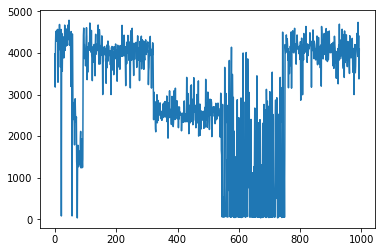

In [36]:
rankdata=[x for x in data['rank'] if x <1E100]# is x < 'infinity'
ranks = [x for x in rankdata if x > 0]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rankdata)
plt.show()